In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 霍夫变换

HoughLines(image, rho, theta, threshold[, lines[, srn[, stn]]]) -> lines

输入图像image是二值化过的图像，rho是rho的精度，theta是theta的精度，threshold表示最短距离直线。

---
## 参考资料

[Hough Line Transform](https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/hough_lines/hough_lines.html)

[霍夫线变换](http://www.opencv.org.cn/opencvdoc/2.3.2/html/doc/tutorials/imgproc/imgtrans/hough_lines/hough_lines.html#hough-lines) 上述OpenCV中关于霍夫线变换的中文文档。

In [2]:
# cv2.HoughLines?
# cv2.Canny?
# cv2.threshold?
# cv2.imread?
# cv2.resize?

In [3]:
img = cv2.imread('../data/chessboard.png', cv2.IMREAD_GRAYSCALE)

In [4]:
height, width = img.shape

In [5]:
new_width = int(width*0.1)
new_height = int(height*0.1)
img = cv2.resize(img, (new_width, new_height))

In [6]:
img.dtype

dtype('uint8')

In [7]:
img.shape

(372, 359)

In [8]:
# 将超过maxval的值设置为255，高于thresh的值也设置为255，低于127的值设置为0
_, img_threshold = cv2.threshold(img, thresh=127, maxval=255, type=cv2.THRESH_BINARY)

In [9]:
img_threshold.dtype

dtype('uint8')

In [10]:
img_threshold.shape

(372, 359)

In [11]:
threshold1 = 50 # 滞后阈值中的低阈值分割值
threshold2 = 150 # 滞后阈值中的高阈值分割值
img_canny = cv2.Canny(img_threshold, threshold1, threshold2, apertureSize=3)

In [12]:
lines = cv2.HoughLines(img_canny, rho=1, theta=np.pi/180, threshold=200)

In [13]:
print(lines.shape)

(1, 14, 2)


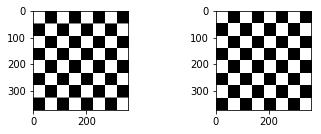

In [14]:
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.subplot(222)
plt.imshow(img_threshold, cmap='gray')

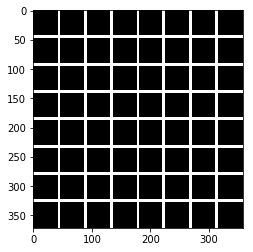

In [15]:
img_lines = np.zeros_like(img)
for line in lines[0]:
    rho = line[0]
    theta = line[1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img_lines, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=3)
plt.imshow(img_lines, cmap='gray')